<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ВВЕДЕНИЕ" data-toc-modified-id="ВВЕДЕНИЕ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ВВЕДЕНИЕ</a></span></li><li><span><a href="#Лед-и-Рис" data-toc-modified-id="Лед-и-Рис-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Лед и Рис</a></span></li><li><span><a href="#Анализ-результатов-А/В-тестирования" data-toc-modified-id="Анализ-результатов-А/В-тестирования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ результатов А/В тестирования</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

# ВВЕДЕНИЕ

Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Задачи:**
1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.
4. Проанализировать результаты А/В теста и принять решение:
* Остановить тест, зафиксировать победу одной из групп
* Остановить тест, зафиксировать отсутствие различий между группами
* Продолжить тест.

# Лед и Рис

In [1]:
#Импортируем библиотеки

import pandas as pd
pd.set_option('display.max_colwidth', 600)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import scipy.stats as stats

In [2]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('здесь была ссылка на датасет')

In [3]:
display(data.head())


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
data['ICE'] = (data['Impact']*data['Confidence'])/data['Efforts']
data['RICE'] = (data['Reach']*data['Impact']*data['Confidence'])/data['Efforts']

In [6]:
display(data.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


In [7]:
display(data.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


**Вывод:** обе методики направлены на выявление гипотез, которые дадут более высокий результат при меньших затратах. 

В рамках предложенных гипотез при применении предложенных фреймворков в топе гипотез оказываются оказываютя именно те варианты, которые обладают высокой степенью уверенности.

**Приоритетные гипотезы по ICE-методике (по убыванию):**
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	

**Приоритетные гипотезы по RICE-методике (по убыванию):**
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Так как в RICE-методике учитываются охваты пользователей, то соответственно гипотезы затрагивающие большее количество пользователей получают дополнительный вес.

# Анализ результатов А/В тестирования

Выгружаем необходимые данные.

In [8]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [9]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
display(visitors.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
print('Количество пустых значенний:')
print(orders.isna().sum())
print('Количество дубликатов:', orders.duplicated().sum())

Количество пустых значенний:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Количество дубликатов: 0


In [14]:
print('Количество пустых значенний:')
print(visitors.isna().sum())
print('Количество дубликатов:',visitors.duplicated().sum())

Количество пустых значенний:
date        0
group       0
visitors    0
dtype: int64
Количество дубликатов: 0


In [15]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


In [16]:
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


Проверим, не пересекаются ли наши пользователи сайта в группах.

In [17]:
#Смотрим пересекающихся пользователей
ordersA = orders.loc[orders['group'] == 'A']
ordersB = orders.loc[orders['group'] == 'B']

double_users = ordersA.loc[ordersA['visitorId'].isin(ordersB['visitorId'])]['visitorId'].unique()
print('Количество повторяющихся пользователей:', len(double_users))


Количество повторяющихся пользователей: 58


In [18]:
print(len(orders))
orders = orders[~orders['visitorId'].isin(double_users)]
print(len(orders))


1197
1016


**Создаем сводную таблицу:**

In [19]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Приступаем к построению графиков.

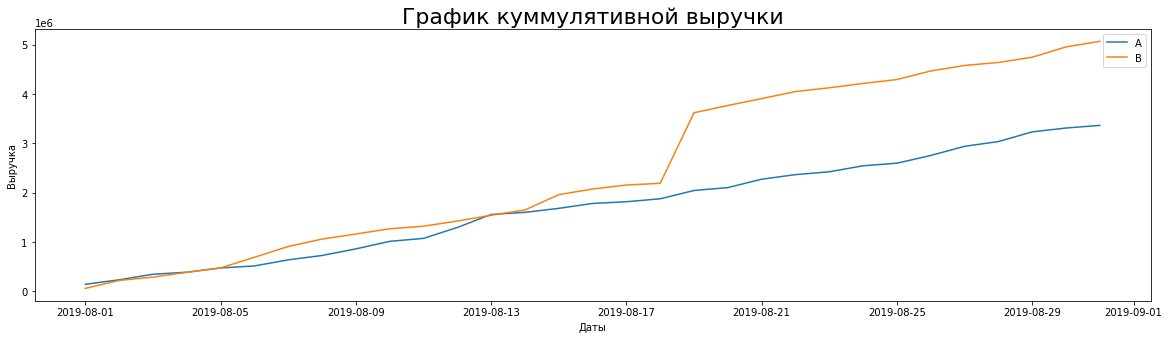

In [20]:
#График куммулятивной выручки
plt.figure(figsize=(20,5))
plt.title('График куммулятивной выручки', fontsize=22)
plt.plot(data['date'], data['revenueCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB'], label='B')
#plt.xticks(rotation=60, horizontalalignment='right')
plt.xlabel("Даты")
plt.ylabel("Выручка")
plt.legend();

По накопленной выручке тестовая группа не уступает основной группе в динамике, однако имеется резкий всплеск, вероятно в тестовую группу попал аномальный по стоимости заказ. В разрезе среднего чека мы сможем детальнее рассмотреть динамику.

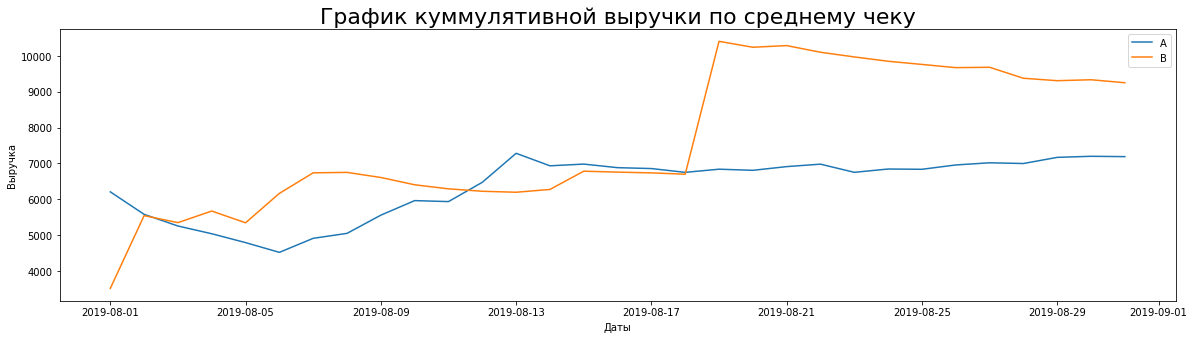

In [21]:
#График куммулятивной выручки по среднему чеку
plt.figure(figsize=(20,5))
plt.title('График куммулятивной выручки по среднему чеку', fontsize=22)
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
#plt.xticks(rotation=60, horizontalalignment='right')
plt.xlabel("Даты")
plt.ylabel("Выручка")
plt.legend();

Действительно, здесь мы можем наблюдать снижение накопленной выручки по среднему чеку, теория с аномальным заказом подтверждается. В противном случае, график группы В продолжал бы расти, но он имеет тенденцию к сближению с графиком группы А.  

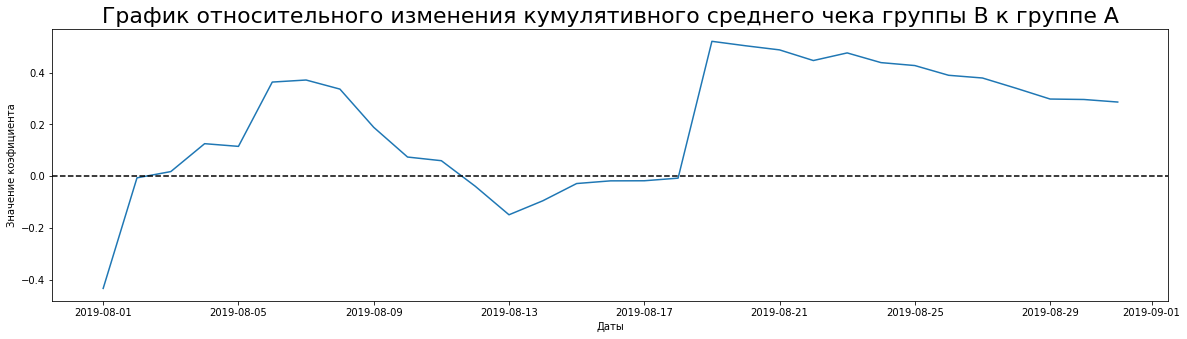

In [22]:
#график относительного изменения кумулятивного среднего чека группы B к группе A
plt.figure(figsize=(20,5))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=22)
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)
plt.xlabel("Даты")
plt.ylabel("Значение коэфициента")
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

#plt.xticks(rotation=60, horizontalalignment='right'); 

График относительного изменения кумулятивного среднего чека группы B к группе A показывает ту же самую динамику. Однако можно заметить, что в целом тренд графика и так показал бы положительную динамику относительно группы А, но правда не с таким большим разрывом.

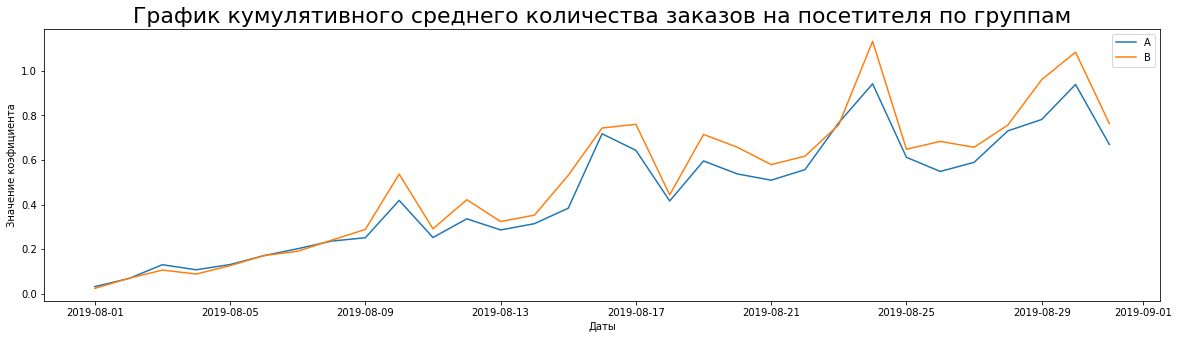

In [23]:
#График кумулятивного среднего количества заказов на посетителя по группам
plt.figure(figsize=(20,5))
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=22)
plt.plot(data['date'], data['ordersCummulativeA']/data['visitorsPerDateA'], label='A')
plt.plot(data['date'], data['ordersCummulativeB']/data['visitorsPerDateB'], label='B')
plt.xlabel("Даты")
plt.ylabel("Значение коэфициента")
#plt.xticks(rotation=60, horizontalalignment='right'); 
plt.legend();

In [24]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

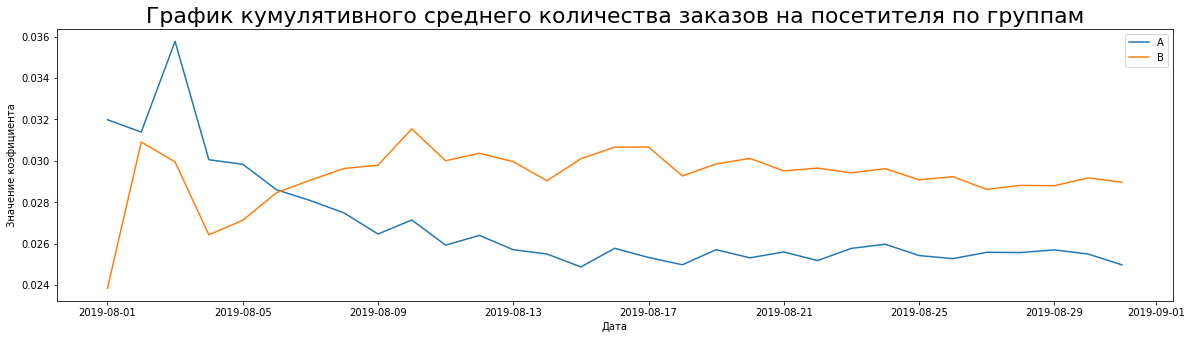

In [25]:
plt.figure(figsize=(20,5))

plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=22)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel("Дата")
plt.ylabel("Значение коэфициента")
plt.legend();

Тестовая группа показывает лучшие показатели по средним заказам 👍

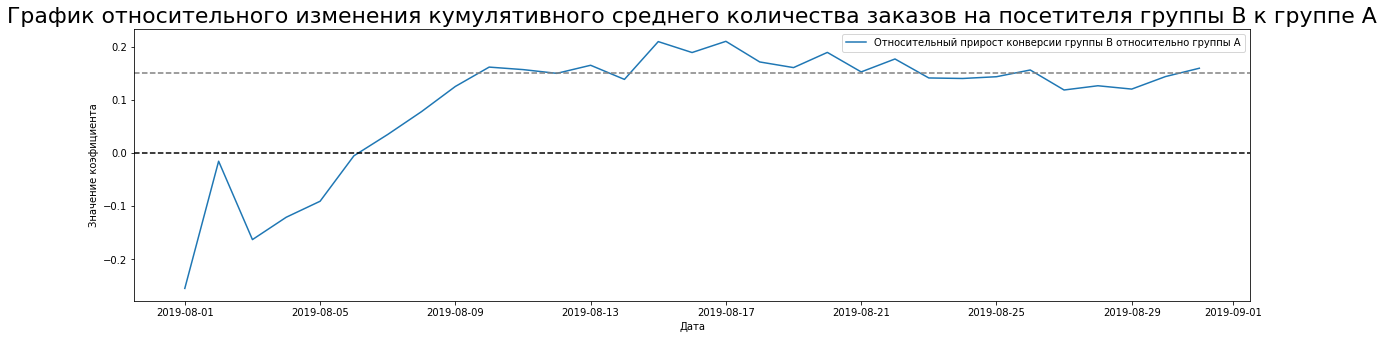

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20,5))
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=22)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xlabel("Дата")
plt.ylabel("Значение коэфициента")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--');

График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A показывает, что по заказам, на протяжении трех недель тестовая группа лидировала по отношению к основной группе.

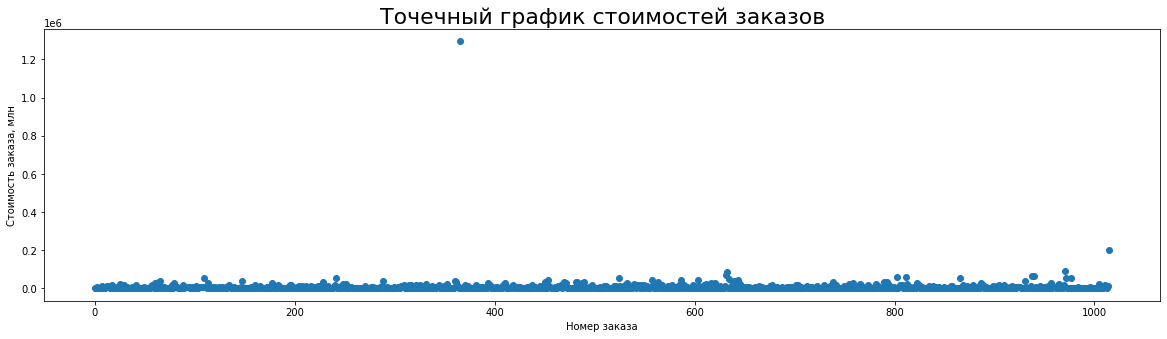

In [27]:
x_values_ord = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(20,5))
plt.title('Точечный график стоимостей заказов', fontsize=22)
plt.xlabel("Номер заказа")
plt.ylabel("Стоимость заказа, млн")
plt.scatter(x_values_ord, orders['revenue']);

На точечном графике стоимостей заказов мы видим, что в целом, заказы распределены достаточно равномерно, за исключением двух заказов, один из которых по всей видимостии обеспечил резкий всплеск на графике с выручкой.

In [28]:
print(np.percentile(orders['revenue'], [90, 95, 99]))
orders_pc = int(np.percentile(orders['revenue'], [95]))

[17990. 26785. 53904.]


Разбивка по перцентилям показывает, что 95% покупателей укладываются в сумму до 26785 рублей (Допустим рублей, в задании не обозначено). Соответственно, возьмем эту сумму для фильтрации аномальных заказов.

In [29]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['Visitor', 'Orders']
display(ordersByUsers)

,Visitor,Orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


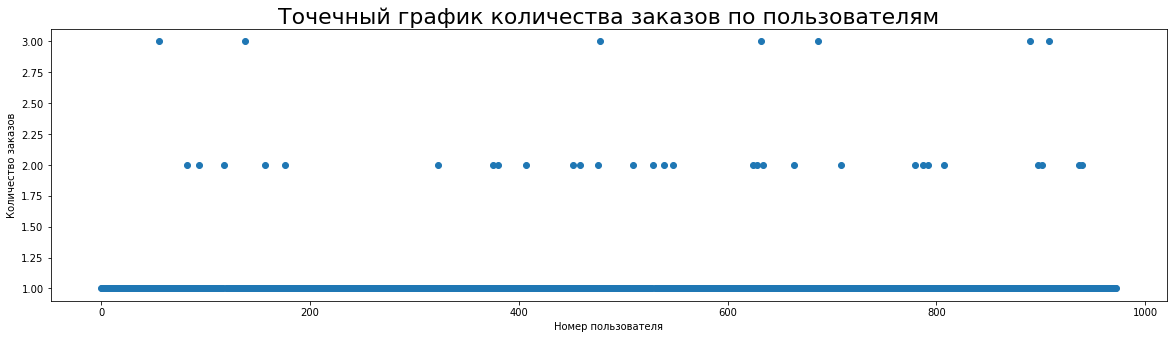

In [30]:
x_values_opu = pd.Series(range(0,len(ordersByUsers['Visitor'])))
plt.figure(figsize=(20,5))
plt.title('Точечный график количества заказов по пользователям', fontsize=22)
plt.scatter(x_values_opu, ordersByUsers['Orders'])
plt.xlabel("Номер пользователя")
plt.ylabel("Количество заказов");

In [31]:
print(np.percentile(ordersByUsers['Orders'], [90, 95, 99]))
ordersByUsers_pc = int(np.percentile(ordersByUsers['Orders'], [95]))

[1. 1. 2.]


В целом можно сказать, что в течении одного месяца довольно немногие покупатели возвращаются за повтороным заказом в наш интернет-магазин. 95% покупателей за месяц сделали только один заказ. Возьмем этот показатель для фильтрации аномальных заказов.

**Смотрим статистическую значимость на сырых данных**

Для расчетов будет применятся непараметрический тест Уилкоксона-Манна-Уитни. Этот метод рассчетов позволяет более достоверно обрабатывать данные в которых есть выбросы.

Критический уровень статистической значимости (alpha) = 0.05

Проверятся будут следующие гипотезы:

H0 - Cтатистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет.

H1 - Cтатистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным есть. 

In [32]:
alpha = 0.05
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


In [33]:
#  статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
or1_pvalue = float("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
if or1_pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )
print('pvalue:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Разница между группами:',"{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

Отвергаем нулевую гипотезу: разница статистически значима
pvalue: 0.01102
Разница между группами: 0.160


H0 - Cтатистически значимых различий в средних чеках между между группами по «сырым» данным нет.

H1 - Cтатистически значимых различий в средних чеках между группами по «сырым» данным есть. 

In [34]:
#статистическая значимость различия средних чеков между группами по «сырым» данным
chek1_pvalue = float('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
if chek1_pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )
print('pvalue:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Разница между группами:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
pvalue: 0.829
Разница между группами: 0.287


**Вывод:** Согласно полученным значениям стат.теста: 
* Есть статистически значимая разница в среднем количестве заказов на посетителя между группами по «сырым» данным, среднее количество заказов на пользователя в группе В больше на 16%
* Нет статистически значимой разницы средних чеков между группами по «сырым» данным, однако средний чек группы В больше на 28,7%

**Смотрим статистическую значимость на очищенных данных**

In [35]:
#Чистим данные
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > ordersByUsers_pc]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > ordersByUsers_pc]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > orders_pc]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64


Проверятся будут следующие гипотезы:

H0 - Cтатистически значимых различий в среднем количестве заказов на посетителя между группами после удаления аномальных пользователей нет.

H1 - Cтатистически значимых различий в среднем количестве заказов на посетителя между группами после удаления аномальных пользователей есть. 

In [36]:
# статистическая значимость различия среднего количества заказов после удаления аномальных пользователей

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

or2_pvalue = float("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

if or2_pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )
print('pvalue:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Разница между группами:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Отвергаем нулевую гипотезу: разница статистически значима
pvalue: 0.01593
Разница между группами: 0.174


H0 - Cтатистически значимых различий в средних чеках между между группами после удаления аномальных пользователей нет.

H1 - Cтатистически значимых различий в средних чеках между группами после удаления аномальных пользователей есть.

In [37]:
#Посчитайте статистическую значимость различия средних чеков после удаления аномальных пользователей
chek2_pvalue = float('{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
if chek2_pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )
print('pvalue:', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Разница между группами:', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
pvalue: 0.727
Разница между группами: -0.034


**Вывод:** Общие выводы по результатам не изменились, однако имеет место некоторая корректировка показателей:
* Есть статистически значимая разница в среднем количестве заказов на посетителя, среднее количество заказов на пользователя в группе В больше на 15,9%. 
* Нет статистически значимой разницы средних чеков между группами, однако средний чек группы А больше на 3,4%

**Смотрим выручку после фильтрации аномальных заказов**

In [38]:
orders_clear = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]
display(orders_clear)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


In [39]:
#Согрешу, но повторю блок кода с созданием сводной таблицы
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders_clear[orders_clear['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders_clear[orders_clear['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

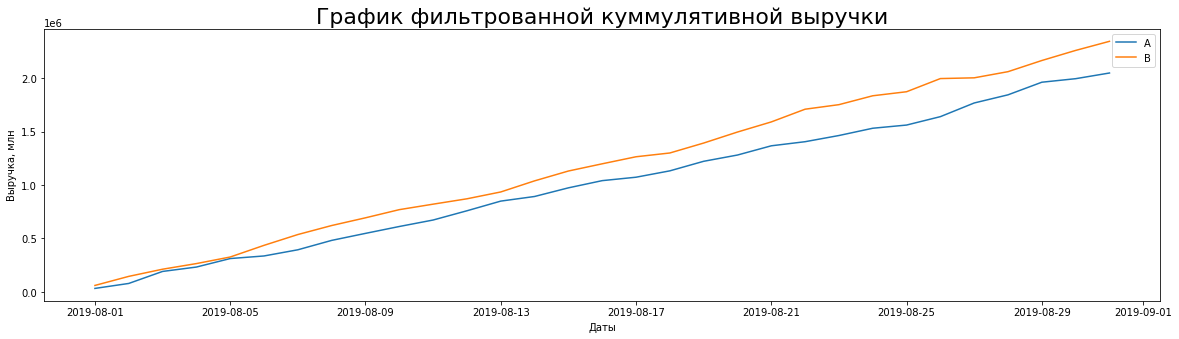

In [40]:
#График фильтрованной куммулятивной выручки
plt.figure(figsize=(20,5))
plt.title('График фильтрованной куммулятивной выручки', fontsize=22)
plt.plot(data['date'], data['revenueCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB'], label='B')
plt.xlabel("Даты")
plt.ylabel("Выручка, млн")
#plt.xticks(rotation=60, horizontalalignment='right')
plt.legend();

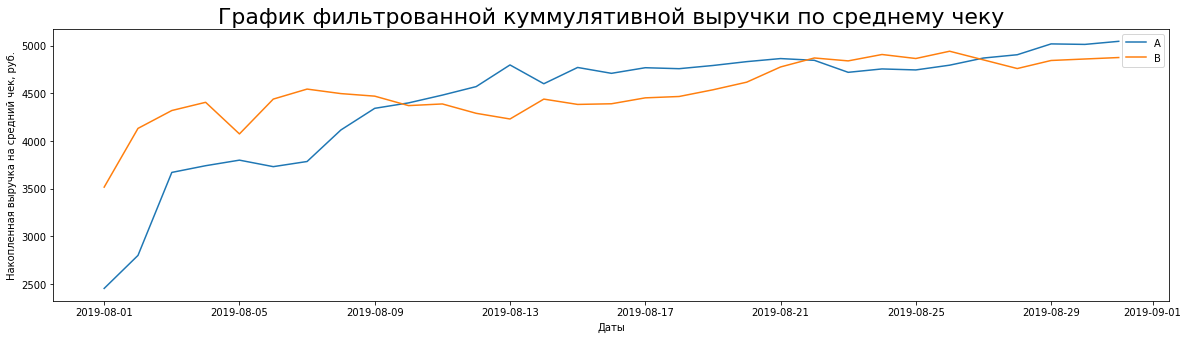

In [41]:
#График фильтрованной куммулятивной выручки по среднему чеку
plt.figure(figsize=(20,5))
plt.title('График фильтрованной куммулятивной выручки по среднему чеку', fontsize=22)
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
plt.xlabel("Даты")
plt.ylabel("Накопленная выручка на средний чек, руб.")
#plt.xticks(rotation=60, horizontalalignment='right')
plt.legend();

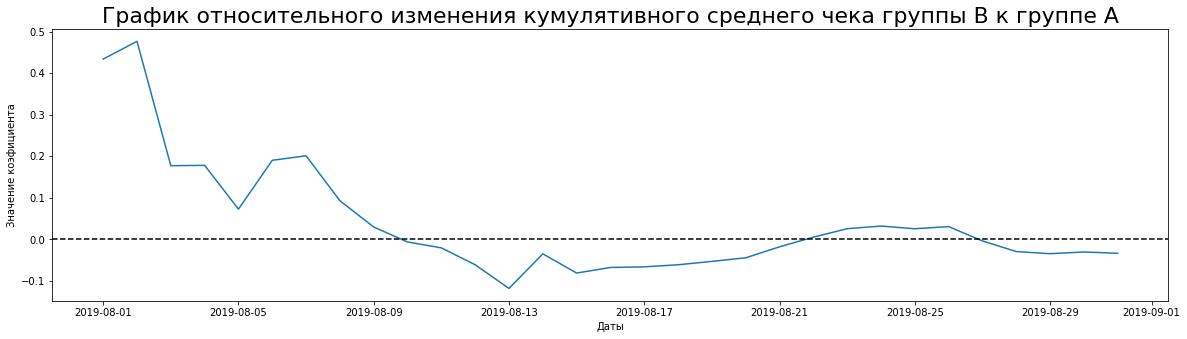

In [42]:
#график фильтрованного относительного изменения кумулятивного среднего чека группы B к группе A
plt.figure(figsize=(20,5))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=22)
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
#plt.xticks(rotation=60, horizontalalignment='right')
plt.xlabel("Даты")
plt.ylabel("Значение коэфициента"); 

In [43]:
datesGroups = orders_clear[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders_clear[
        np.logical_and(
            orders_clear['date'] <= x['date'], orders_clear['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

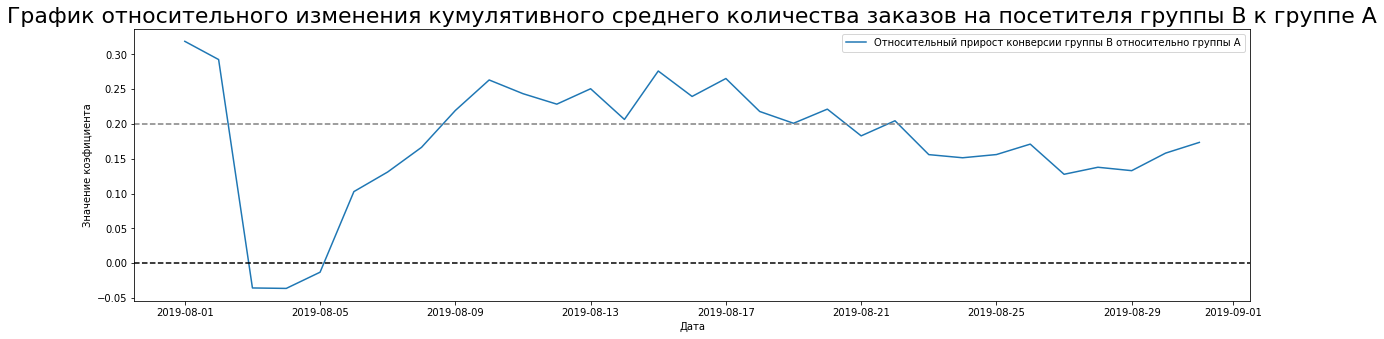

In [44]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20,5))
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=22)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xlabel("Дата")
plt.ylabel("Значение коэфициента")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--');

**Вывод:** Отфильтровав аномальные заказы, мы с уверенностью можем сказать, что тест можно прекращать, победа за группой В. Хоть средний чек заказа упал, но при этом тестовая группа показывает больший объем заказов и выручку соответственно.

# Итоговый вывод

**В начале исследования были поставленны следующие задачи:**

1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

4. Проанализировать результаты А/В теста и принять решение:
* Остановить тест, зафиксировать победу одной из групп
* Остановить тест, зафиксировать отсутствие различий между группами
* Продолжить тест.

**В ходе исследования были достигнуты следующие результат и сформулированны следующие выводы.**


**Приоретизация гипотез по фреймворкам ICE/RICE:** 
1. Методики ICE/RICE направлены на выявление гипотез, которые дадут более высокий результат при меньших затратах ресурсов и усилий.

2. В рамках предложенных гипотез при применении предложенных фреймворков в топе гипотез оказываются оказываютя именно те варианты, которые обладают высокой степенью уверенности.

3. Так как в RICE-методике учитываются охваты пользователей, то соответственно гипотезы затрагивающие большее количество пользователей получают дополнительный вес.

**Приоритетные гипотезы по ICE-методике (по убыванию):**
1. Запустить акцию, дающую скидку на товар в день рождения

2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	

**Приоритетные гипотезы по RICE-методике (по убыванию):**
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию



**Ключевые выводы в рамках проведенного А/В тестирования:**
1. Разбивка по перцентилям показывает, что:
* 95% покупателей укладываются в сумму до 26785 рублей
* 95% покупателей за месяц сделали только один заказ
2. По результатам непараметрического теста Уилкоксона-Манна-Уитни можно утверждать что:
* Есть статистически значимая разница в среднем количестве заказов на посетителя между группами, среднее количество заказов на пользователя в группе В больше на 15,9%. 
* Нет статистически значимой разницы средних чеков между группами, однако средний чек группы А больше на 3,4%
3. Средний чек заказа в тестовой группе ниже, но при этом тестовая группа показывает больший объем заказов и выручку.

4. На основе изложенного, рекомендуем *остановить тест и зафиксировать победу тестовой группы В.*